In [2]:
import math
import numpy as np
import scipy
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random

In [3]:
def TraceFctReEmpirique(X0):
    """Fontion qui trace la fontion de répartition empirique d'une variable aléatoire"""
    card = len(X0)
    y = [0]
    X = X0
    X.sort()
    X = np.concatenate((np.array([X[0]-1]), X , np.array([X[-1]+1])))
    for i in range(card+1):
        y.append(i/card)
    plt.step(X,y,label=f'Card = {card}')
    plt.legend()
    plt.grid()

In [41]:
def binomiale(n,p):
    """Fonction de répartition d'une loi binomiale(n,p)"""
    succes = 0
    for i in range(n):
        tirage = random.uniform(0, 1)
        if tirage < p:
            succes += 1   
    return succes

def convergence_binom_vers_poisson(N, mu, n):
    """Fontion qui montre la convergence en loi d'une binomiale vers une variable aléatoire de loi de Poisson(mu)"""
    X = [binomiale(n,mu/n) for i in range(N)]
    K = 12
    Y = [np.exp(-mu) * (mu/math.factorial(k)) for k in range(1,K+1)]
    card = plt.hist(X,np.arange(1,K+1))
    eps = 0.01
    plt.clf()
    plt.figure()
    plt.title(f'Loi empirique de {N} variables binomiales')
    plt.xlabel('Valeurs')
    plt.ylabel('Fréquences empiriques')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.bar(np.arange(K-1),card[0]/N,color='lightblue')
    plt.scatter(np.arange(K-1),card[0]/N)
    plt.plot(np.arange(K),Y)
    plt.legend([f"card de Xi=k, k∈[0,10]",f'loi de Poisson de paramètre µ',f'diagrame bâton de Xi'])
    plt.show()

<Figure size 640x480 with 0 Axes>

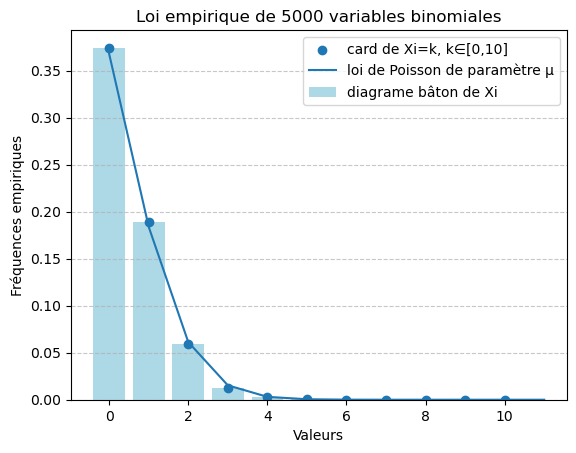

In [42]:
#Test de la convergence en loi:
convergence_binom_vers_poisson(5000,1,200)

In [48]:
def geometique(p):
    """Fonction de répartition d'une loi géometrique(p)"""
    k = 0
    while np.random.rand() > p:
        k += 1
    return k

def convergence_geom_vers_poisson(N, mu, n):
    """Fontion qui montre la convergence en loi d'une géometrique vers une variable aléatoire de loi de Poisson(mu)"""
    X = [geometique(mu/n)/n for i in range(N)]
    K = 15
    Y = [np.exp(-mu) * (mu/math.factorial(k)) for k in range(1,K+1)]
    card = plt.hist(X,np.arange(1,K+1))
    eps = 0.01
    plt.clf()
    plt.figure()
    plt.title(f'Loi empirique de {N} variables binomiales')
    plt.xlabel('Valeurs')
    plt.ylabel('Fréquences empiriques')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.bar(np.arange(K-1),card[0]/N,color='lightblue')
    plt.scatter(np.arange(K-1),card[0]/N)
    plt.plot(np.arange(K),Y)
    plt.legend([f'card de Xi=k',f'loi exponetiel de paramètre µ',f'diagrame bâton'])
    plt.show()

<Figure size 640x480 with 0 Axes>

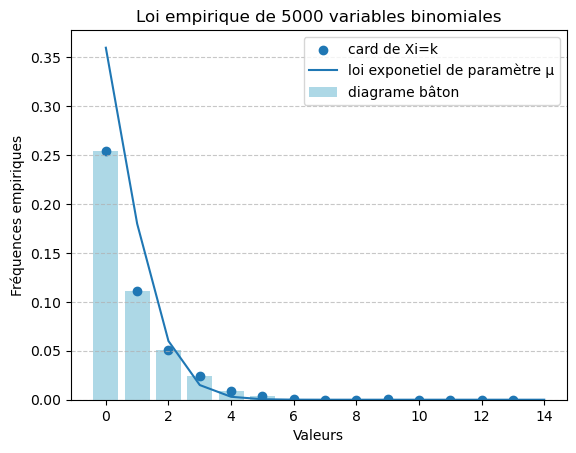

In [49]:
#Test de cette convergence:
convergence_geom_vers_poisson(5000,0.8,100)

In [56]:
def exponentielle(N,mu):
    """Fontion de répartition d'une loi exponnetielle(N,mu)"""
    return [np.exp(-mu) * (mu/math.factorial(k)) for k in range(1,N+1)]

def grands_nombres_expo(N,mu):
    """Loi des grand nombre pour la loi exponnentielle"""
    X = [exponentielle(N,mu) for i in range(N)]
    f = []
    for n in range(1,N+1):
        f = [np.sum(K)/n for K in X[n-1]]
    plt.plot(np.arange(N),f)
    plt.axvline(1/mu,color='r',ls='--')
    plt.legend([f'échantillon de (X1+...+Xn )/n',f'E[X1]=1/µ'])
    plt.grid()

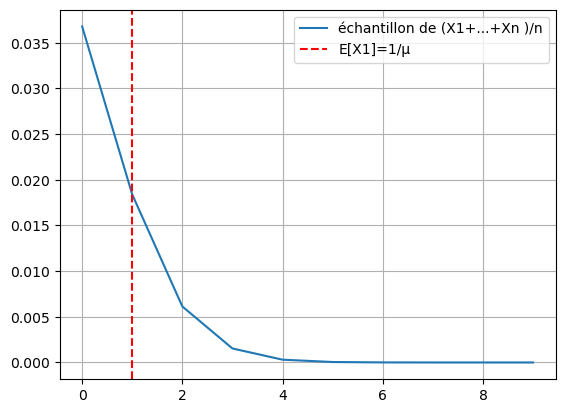

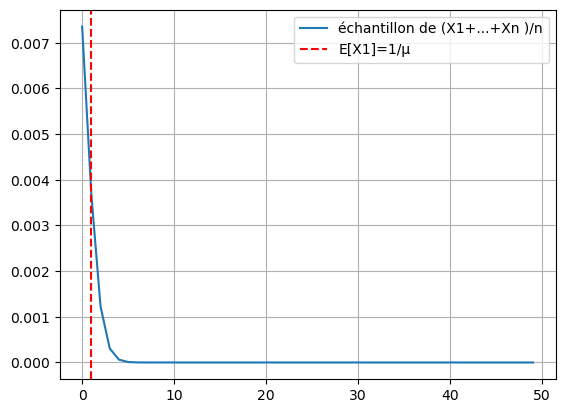

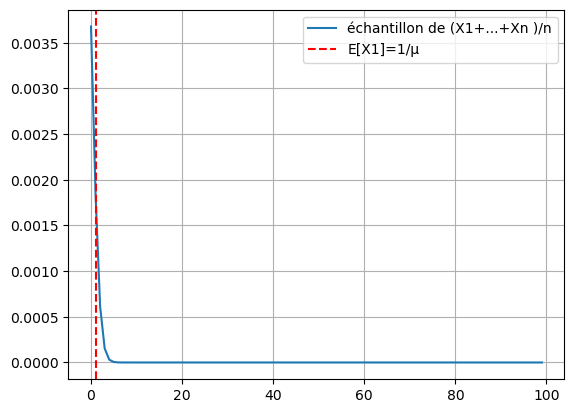

<Figure size 640x480 with 0 Axes>

In [58]:
#Test de la Loi des grands nombres:
for n in [10,50,100]:
    grands_nombres_expo(n,1)
    plt.figure()
plt.show()